
### IPL 2022 Capstone Project
**The Indian Premier League (IPL) is a professional T20 cricket league in India, featuring franchises representing cities. This project explores IPL 2022 match-level data to derive meaningful insights and understand match outcomes, player performances, and team dynamics.**

**These are some of the important columns that we'll focus on for meaningful insights in this project.**

**column names: Variable Type**

- date : string
- venue : string
- stage : string
- team1 : string
- team2 : string
- toss_winner : string
- toss_decision : string
- first_ings_score : integer
- second_ings_score : integer
- match_winner : string
- won_by : string
- margin : integer
- player_of_the_match : string
- top_scorer : string
- highscore : integer
- best_bowling : string
- best_bowling_fgure : string
- gure : string

#### **Loading the Libraries and Dataset**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('IPL.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


#### **Basic Information**

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   match_id             74 non-null     int64
 1   date                 74 non-null     str  
 2   venue                74 non-null     str  
 3   team1                74 non-null     str  
 4   team2                74 non-null     str  
 5   stage                74 non-null     str  
 6   toss_winner          74 non-null     str  
 7   toss_decision        74 non-null     str  
 8   first_ings_score     74 non-null     int64
 9   first_ings_wkts      74 non-null     int64
 10  second_ings_score    74 non-null     int64
 11  second_ings_wkts     74 non-null     int64
 12  match_winner         74 non-null     str  
 13  won_by               74 non-null     str  
 14  margin               74 non-null     int64
 15  player_of_the_match  74 non-null     str  
 16  top_scorer           74 non-null     st

Check the size of rows and columns of the dataset

In [6]:
# df.shape
print(f'your data set has {df.shape[0]} rows and {df.shape[1]} columns')

your data set has 74 rows and 20 columns


In [7]:
df.describe()

,match_id,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,margin,highscore
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,37.500000,171.121622,6.135135,158.540541,6.175676,16.972973,71.716216
std,21.505813,29.048355,2.222699,29.299207,2.639832,19.651047,20.705052
min,1.000000,68.000000,0.000000,72.000000,1.000000,2.000000,28.000000
25%,19.250000,154.250000,5.000000,142.750000,4.000000,5.250000,57.000000
50%,37.500000,169.500000,6.000000,160.000000,6.000000,8.000000,68.000000
75%,55.750000,192.750000,8.000000,176.000000,8.000000,18.000000,87.750000
max,74.000000,222.000000,10.000000,211.000000,10.000000,91.000000,140.000000


Now let's see how many columns have null values in total.

In [11]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

### **Now, Here comes some Basic Questions**

1. Which team won the most matches?

In [12]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


Text(0.5, 1.0, 'Match Winners plot')

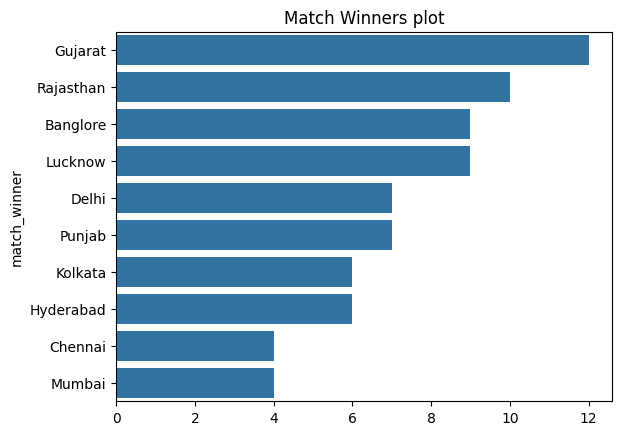

In [30]:
match_winners=df['match_winner'].value_counts()
sns.barplot(y=match_winners.index,x=match_winners.values)
plt.title('Match Winners plot')

2. Toss Decision Trends

Text(0.5, 1.0, 'Toss Decision Trend')

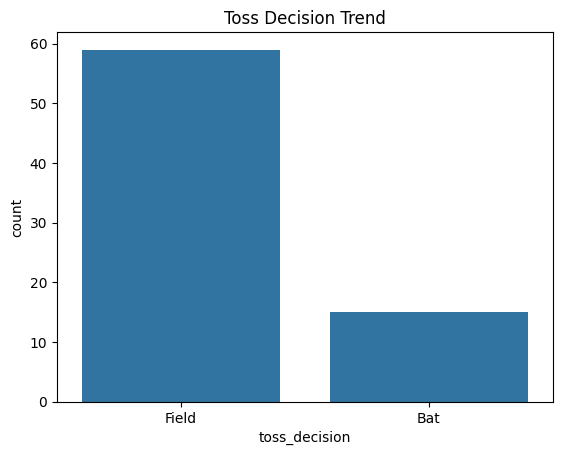

In [36]:
toss_decision=df['toss_decision']
toss_decision

sns.countplot(x=toss_decision)
plt.title('Toss Decision Trend')

3. Toss Winner vs Match Winner

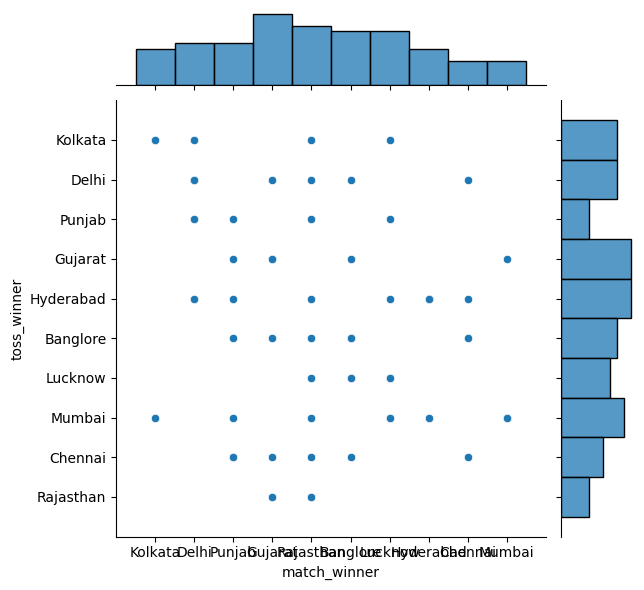

In [43]:
sns.jointplot(y=df['toss_winner'],x=df['match_winner'])

In [57]:
count=df[df['toss_winner']==df['match_winner']]['match_id'].count()
percentage=(count*100)/df.shape[0]
percentage.round(3)

np.float64(48.649)

4. How do teams win? (Runs vs Wickets)

Text(0.5, 1.0, 'Won by Trend')

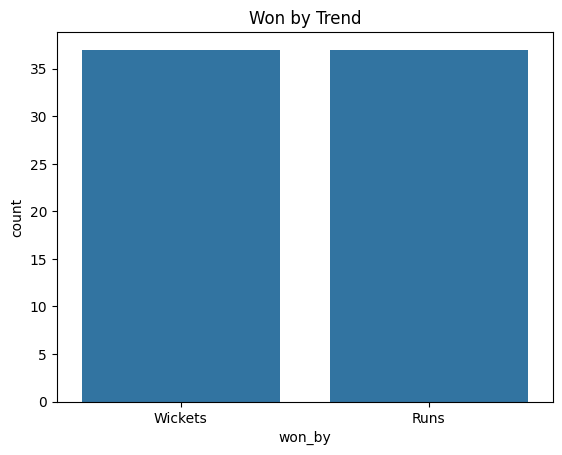

In [59]:
sns.countplot(x=df['won_by'])
plt.title('Won by Trend')

#### **Key Player Performances**

1. Most "Player of the Match" Awards

Text(0.5, 1.0, 'Top 10 Players of match')

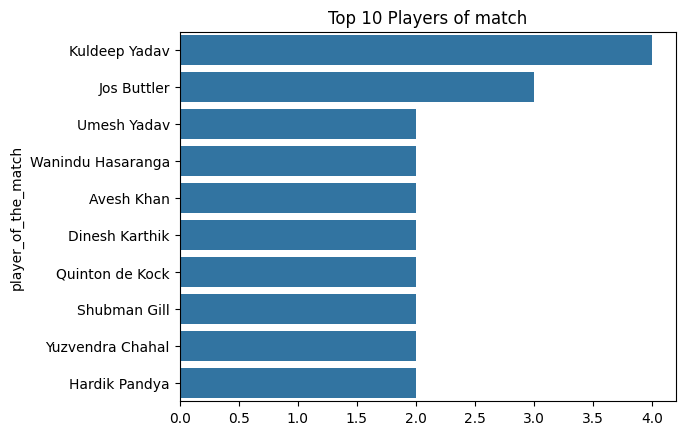

In [68]:
top_10_count=df['player_of_the_match'].value_counts().head(10)

sns.barplot(y=top_10_count.index,x=top_10_count.values)
plt.title('Top 10 Players of match')



2. 2 Top Scorers

<Axes: ylabel='top_scorer'>

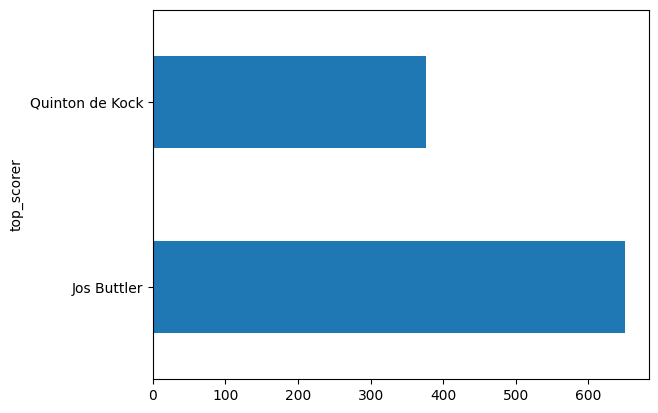

In [88]:
top_highscorer=df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
top_highscorer.plot(kind='barh')

3. 10 Best Bowling Figures

In [89]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


<Axes: ylabel='best_bowling'>

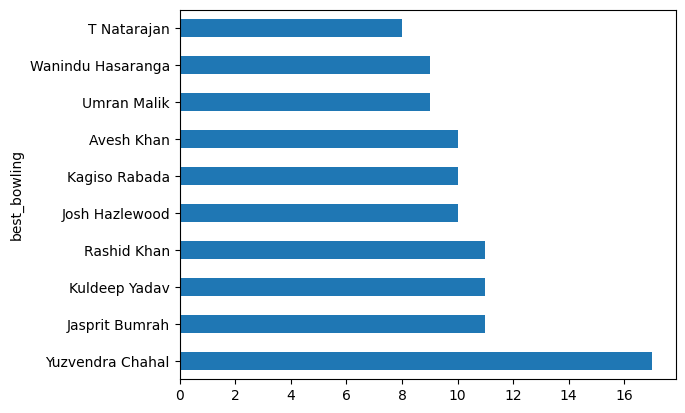

In [105]:
df['highest_wicket']=df['best_bowling_figure'].apply(lambda x:x.split('--')[0])
df['highest_wicket']=df['highest_wicket'].astype(int)
top_bowlers=df.groupby('best_bowling')['highest_wicket'].sum().sort_values(ascending=False).head(10)
top_bowlers.plot(kind='barh')

#### **Venue Analysis**
1. Most Matches Played by Venue

<Axes: ylabel='venue'>

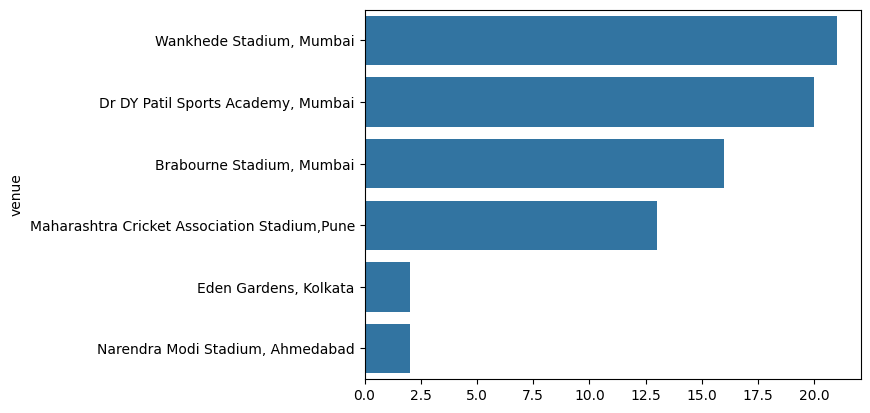

In [114]:
venue=df['venue'].value_counts()
sns.barplot(y=venue.index,x=venue.values)

<Axes: xlabel='count', ylabel='venue'>

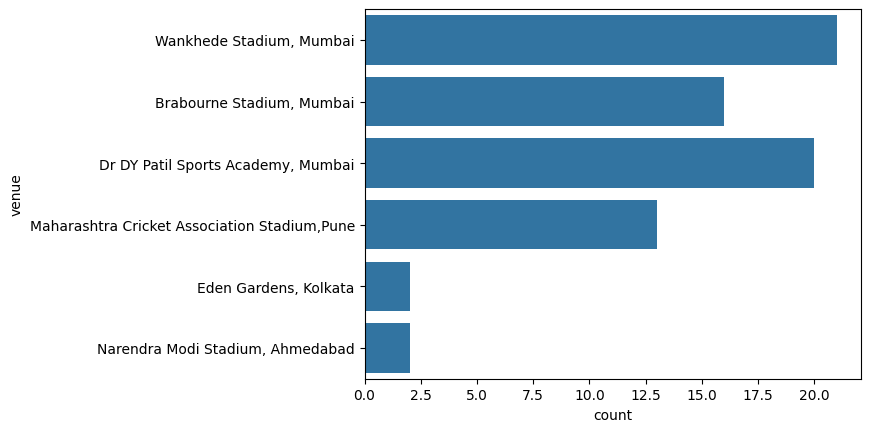

In [127]:
venue=df['venue']
sns.countplot(venue)

#### **Custom Questions & Insights**
Q1: Who won the highest margin by runs?

In [128]:
df.head(2)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wicket
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3


In [143]:
df[df['won_by']=='Runs'].sort_values(by='margin',ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


Q2: Which player had the highest individual score?

In [146]:
df[df['highscore']==df['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


Q3: Which bowler had the best bowling figures?

In [151]:
df[df['highest_wicket']==df['highest_wicket'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
